> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
% matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#I want to display all the code in a shell, not just the last output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Predicting "no shows" in the Sao Paolo dataset 

### General Properties of the dataset

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

<a id='wrangling'></a>
## Data Wrangling


In [248]:
# Load the data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("data/KaggleV2-May-2016.csv")
df.shape

(110527, 14)

In [249]:
#lets have a look at the first and last lines of data and a random sample
df.head()
df.tail()
df.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
52968,1.314323e+11,5707625,F,2016-05-17T09:52:34Z,2016-05-18T00:00:00Z,35,SÃO JOSÉ,0,0,0,0,0,0,No
73338,9.555944e+13,5694478,F,2016-05-13T08:41:10Z,2016-05-13T00:00:00Z,17,ITARARÉ,1,0,0,0,0,0,Yes
32827,8.195617e+11,5605857,F,2016-04-20T09:33:25Z,2016-05-05T00:00:00Z,25,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
59804,1.118281e+13,5588545,M,2016-04-15T10:09:37Z,2016-05-24T00:00:00Z,64,JUCUTUQUARA,0,0,0,0,0,1,No
47285,8.317445e+14,5705200,M,2016-05-17T06:49:14Z,2016-05-19T00:00:00Z,59,ROMÃO,0,0,0,0,0,0,Yes
79105,2.486723e+12,5701748,F,2016-05-16T10:56:49Z,2016-05-17T00:00:00Z,53,TABUAZEIRO,0,0,0,0,0,0,No
86154,9.476997e+13,5535752,F,2016-04-01T07:49:55Z,2016-06-01T00:00:00Z,66,JARDIM CAMBURI,0,0,0,0,0,1,No
37646,4.585119e+13,5743738,F,2016-05-30T09:21:31Z,2016-05-30T00:00:00Z,85,ARIOVALDO FAVALESSA,0,1,1,0,0,0,No
47148,8.317445e+14,5637421,M,2016-04-29T06:50:44Z,2016-05-03T00:00:00Z,59,ROMÃO,0,0,0,0,0,1,No
28898,5.482421e+13,5671254,F,2016-05-06T16:03:44Z,2016-05-18T00:00:00Z,20,ROMÃO,0,0,0,0,0,0,No


In [250]:
# how many missing or NaN values?
df.describe()
df.info()
# none...awesome! Actually, going to try this as well...
df['PatientId'].count()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


110527

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [71]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [251]:
# let's check out the data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [252]:
# Most of it looks ok. Patient ID sticks out like a sore thumb though. It needs to be INT64. 
# However, changing it may result in an exponential
df['PatientId'] = df['PatientId'].astype('int64')
df['PatientId'].dtype
df.head()

dtype('int64')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [280]:
# we should probably also change the data types of ScheduledDay and AppointmentDay to datetime.
from datetime import datetime
#df['AppointmentID'] = datetime.strptime(df['AppointmentID'], '%b %d %Y %I:%M%p')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

110517   2016-06-07 07:38:34
110518   2016-04-27 15:15:06
110519   2016-04-27 15:23:14
110520   2016-05-03 07:51:47
110521   2016-05-03 08:23:40
110522   2016-05-03 09:15:35
110523   2016-05-03 07:27:33
110524   2016-04-27 16:03:52
110525   2016-04-27 15:09:23
110526   2016-04-27 13:30:56
Name: ScheduledDay, dtype: datetime64[ns]

In [281]:
# Something to note: max age of 115, min age of -1? See output of "describe"
# I wonder how many more centenarians there are and whether this is an outlier...well, 
# the negative person certainly is...unless they considered a fetus. let's do some queries
df.query('Age >= 100' or 'Age = 0') 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,976294799775439,5651757,F,2016-05-03 09:14:53,2016-05-03,102,CONQUISTA,0,0,0,0,0,0,No
63912,31963211613981,5700278,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,31963211613981,5700279,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,31963211613981,5562812,F,2016-04-08 14:29:17,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,31963211613981,5744037,F,2016-05-30 09:44:51,2016-05-30,115,ANDORINHAS,0,0,0,0,1,0,No
79270,9739429797896,5747809,M,2016-05-30 16:21:56,2016-05-31,100,TABUAZEIRO,0,0,0,0,1,0,No
79272,9739429797896,5747808,M,2016-05-30 16:21:56,2016-05-31,100,TABUAZEIRO,0,0,0,0,1,0,No
90372,234283596548,5751563,F,2016-05-31 10:19:49,2016-06-02,102,MARIA ORTIZ,0,0,0,0,0,0,No
92084,55783129426615,5670914,F,2016-05-06 14:55:36,2016-06-03,100,ANTÔNIO HONÓRIO,0,0,0,0,0,1,No
97666,748234579244724,5717451,F,2016-05-19 07:57:56,2016-06-03,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [282]:
# Surely this cant be right? There are 7 people over the age of 100, five of whom are 115!
# I think these are duplicates. Because the 100 and 102 year olds may be correct. 
# Will need to decide what to keep and what to rid of...
# And on closer inspection, it looks as though there are duplicates in the dataset. row 63912 and 63915 
# are duplicates created (probably) by call center errors when appointments were created. 
# The patientID AND ScheduledDay are the same. 
sum(df.duplicated(subset = ['PatientId', 'ScheduledDay']))
#I used these next lines to have a look at all the duplicates with their originals.
dfdups = df.loc[df.duplicated(subset=['PatientId', 'ScheduledDay'], keep = False), :]
dfdups

1334

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
153,19252634865,5636932,F,2016-04-28 16:38:34,2016-04-29,30,ITARARÉ,0,0,0,0,0,0,No
154,19252634865,5636933,F,2016-04-28 16:38:34,2016-04-29,30,ITARARÉ,0,0,0,0,0,0,No
287,22462135793684,5532909,M,2016-03-31 12:39:06,2016-04-29,43,CARATOÍRA,0,0,0,0,0,0,Yes
288,22462135793684,5532908,M,2016-03-31 12:39:06,2016-04-29,43,CARATOÍRA,0,0,0,0,0,1,Yes
362,74227955271117,5575146,F,2016-04-12 17:12:17,2016-04-29,1,TABUAZEIRO,0,0,0,0,0,0,No
363,74227955271117,5575145,F,2016-04-12 17:12:17,2016-04-29,1,TABUAZEIRO,0,0,0,0,0,1,No
367,2213979373713,5613287,F,2016-04-25 09:11:02,2016-04-29,39,ANDORINHAS,0,1,1,0,0,1,No
368,434159987798224,5639864,F,2016-04-29 09:43:15,2016-04-29,39,PRAIA DO CANTO,0,0,0,0,0,0,No
369,434159987798224,5639863,F,2016-04-29 09:43:15,2016-04-29,39,PRAIA DO CANTO,0,0,0,0,0,0,No
370,4497415116,5600826,F,2016-04-19 11:16:27,2016-04-29,11,BELA VISTA,0,0,0,0,0,0,No


Deciding which ones to keep is a bit difficult. Initially I though I could just remove the 
entry created first (based on "AppointmentID") but on closer look at the head and tail, 
it looks as though "SMS recieved" is different in each case. So its almost as if, there was 
an error in registration and this affected the SMS. So perhaps the SMS was recieved only when 
the registration was valid. in which case, we should keep the one where SMS recieved = 1. 
However, its not the case for all of them. But I need to make a decision...perhaps I should check
first if "recieving an SMS" had any effect on the outcome? But if you look at rows 110417 and 110420,
you'll notice that although the patient recieved an SMS there was a no show while she showed up for
the one with the error. So it feels too random. 

Also, what's up with row 367 in dfdups? why is that a duplicate? I dont know...

In [283]:
# i tried to get the maximum of SMS_recieved instead of takign the last but it turned out to be too complicated. See
# hashed out code below:
# dfcrap = df.groupby(['PatientId', 'ScheduledDay'], group_keys=False).apply(lambda x: x.loc[x.SMS_received.idxmax()])
# To be hones tit worked, but there were two problems: it was really expensive and took ages and (2) it left my 
# dataset grouped by PatientId and ScheduledDay, and I didnt know how to "ungroup" or unstack it...
# So I've gone with a much quicker method: sort first then drop the first. This assumes that the first recodring
# of the patient registration is false. 
df.sort_values('PatientId', inplace = True)
df.drop_duplicates(subset= ['PatientId', 'ScheduledDay'], keep='last', inplace = True)
df.shape

# By the way, how can you do all of this on one line? I know why this doesnt work but not sure how to rectify it
# df.sort_values('PatientId', inplace = True).drop_duplicates(subset= ['PatientId', 'ScheduledDay'], keep='last', inplace = True)

(109193, 14)

In [285]:
df.to_csv('data/no_show_sorted.csv', index=False)

In [47]:
# this chunk of code was used to make sense of groupby, sort and drop_duplicates
data = {'ID':[1,2,3,4,2,3,1],'salary':[1e3,1.2e3,1e3,2e3,1.5e3,900,3e3]}
dfcrap = pd.DataFrame(data).assign(more_data=range(7))
dfcrap
dfcrap = dfcrap.sort_values(['salary']).drop_duplicates('ID', keep='first')
dfcrap
#dfnew = dfcrap.groupby('ID', group_keys=False).apply(lambda x: x.loc[x.salary.idxmax()])
#dfnew
#salary_max = df.groupby(['A']).salary.transform(max)
#df = df[df.salary == salary_max]

,ID,salary,more_data
0,1,1000.0,0
1,2,1200.0,1
2,3,1000.0,2
3,4,2000.0,3
4,2,1500.0,4
5,3,900.0,5
6,1,3000.0,6


,ID,salary,more_data
5,3,900.0,5
0,1,1000.0,0
1,2,1200.0,1
3,4,2000.0,3


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

The main question to be answered in the no-show data set is: "What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?" As I dont plan to do predictive analysis on this dataset, my two research questions will aid in future predictive analysis of this dataset. 

### Research question 1: Which factors are highly correlated to outcome?

In [4]:
# read in the sorted data and make sure its all ok
df_sort = pd.read_csv("data/no_show_sorted.csv")
df_sort.shape
df_sort.head()
df_sort.dtypes

(109193, 14)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,39217,5751990,F,2016-05-31 10:56:41,2016-06-03 00:00:00,44,PRAIA DO SUÁ,0,0,0,0,0,0,No
1,43741,5760144,M,2016-06-01 14:22:58,2016-06-01 00:00:00,39,MARIA ORTIZ,0,0,1,0,0,0,No
2,93779,5712759,F,2016-05-18 09:12:29,2016-05-18 00:00:00,33,CENTRO,0,0,0,0,0,0,No
3,141724,5637648,M,2016-04-29 07:13:36,2016-05-02 00:00:00,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No
4,537615,5637728,F,2016-04-29 07:19:57,2016-05-06 00:00:00,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No


PatientId          int64
AppointmentID      int64
Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
dtype: object

In [5]:
# looks like the data types from before weren't preserved. 
df_sort['AppointmentDay'] = pd.to_datetime(df_sort['AppointmentDay'])
df_sort['ScheduledDay'] = pd.to_datetime(df_sort['ScheduledDay'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1174ce4a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11483a2b0>]], dtype=object)

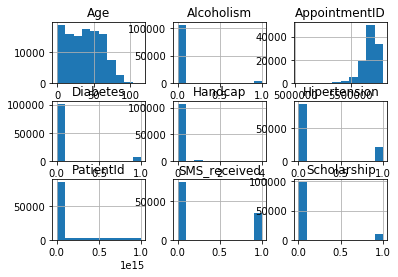

In [6]:
# I'd like to first see this dataset visually
df_sort.hist()

To do correlations I've got to change the categorical variables to dummies

In [7]:
#import get_dummies
df_sort = df_sort.join(pd.get_dummies(df_sort['Gender']))
df_sort = df_sort.join(pd.get_dummies(df_sort['No-show']))
df_sort.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,F,M,No,Yes
0,39217,5751990,F,2016-05-31 10:56:41,2016-06-03,44,PRAIA DO SUÁ,0,0,0,0,0,0,No,1,0,1,0
1,43741,5760144,M,2016-06-01 14:22:58,2016-06-01,39,MARIA ORTIZ,0,0,1,0,0,0,No,0,1,1,0
2,93779,5712759,F,2016-05-18 09:12:29,2016-05-18,33,CENTRO,0,0,0,0,0,0,No,1,0,1,0
3,141724,5637648,M,2016-04-29 07:13:36,2016-05-02,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No,0,1,1,0
4,537615,5637728,F,2016-04-29 07:19:57,2016-05-06,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No,1,0,1,0
5,5628261,5680449,M,2016-05-10 11:58:18,2016-05-13,13,PARQUE MOSCOSO,0,0,0,0,0,0,Yes,0,1,0,1
6,11831856,5718578,M,2016-05-19 09:42:07,2016-05-19,16,SANTO ANTÔNIO,0,0,0,0,0,0,No,0,1,1,0
7,22638656,5715081,F,2016-05-18 13:37:12,2016-06-08,23,INHANGUETÁ,0,0,0,0,0,1,No,1,0,1,0
8,22638656,5580835,F,2016-04-14 07:23:30,2016-05-03,22,INHANGUETÁ,0,0,0,0,0,1,No,1,0,1,0
9,52168938,5607220,F,2016-04-20 11:22:15,2016-05-17,28,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0,1,0


I'm not too happy with using dummy variables but I suppose I'm not going to run any predictive algorithms on this data just as yet...so for now, to find correlation coefficients, I dont think it's a bad approach 

In [8]:
# my first instinct is that SMS recieved may be strongly correlated - its not
df_sort[['SMS_received','Yes']].corr()

,SMS_received,Yes
SMS_received,1.000000,0.128601
Yes,0.128601,1.000000


In [183]:
# Nor are any of the other variables, in fact, they are all poorly correlated:
# neither age nor chronic illness is correlated to no-show. 
df_sort[['Age','Hipertension','Diabetes','Alcoholism','Handcap','Yes']].corr()

,Age,Hipertension,Diabetes,Alcoholism,Handcap,Yes
Age,1.000000,0.504875,0.292694,0.095762,0.077452,-0.060768
Hipertension,0.504875,1.000000,0.432652,0.087614,0.080345,-0.035752
Diabetes,0.292694,0.432652,1.000000,0.018704,0.058284,-0.014210
Alcoholism,0.095762,0.087614,0.018704,1.000000,0.002339,-0.000644
Handcap,0.077452,0.080345,0.058284,0.002339,1.000000,-0.006024
Yes,-0.060768,-0.035752,-0.014210,-0.000644,-0.006024,1.000000


In [184]:
df_sort[['Scholarship', 'Yes']].corr()

,Scholarship,Yes
Scholarship,1.000000,0.029457
Yes,0.029457,1.000000


In [185]:
df_sort[['Age','F','M','Yes']].corr()

,Age,F,M,Yes
Age,1.000000,0.107164,-0.107164,-0.060768
F,0.107164,1.000000,-1.000000,0.004807
M,-0.107164,-1.000000,1.000000,-0.004807
Yes,-0.060768,0.004807,-0.004807,1.000000


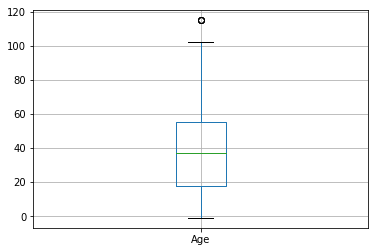

In [164]:
# outliers can affect correlations. Perhaps a quantiles box plot would help if there are any, 
# such as the 155 year old man from Andorinhas
df_sort.boxplot('Age')
# Actually, I dont believe this has outliers and if it does, I'm not sure how to find it in categorical datasets.
# Age is the only one that could possibly have outliers and I'm beginning to blieve that a 115 year old man 
# exists in Andorinhas

col_0,count
No-show,
No,87327
Yes,21866


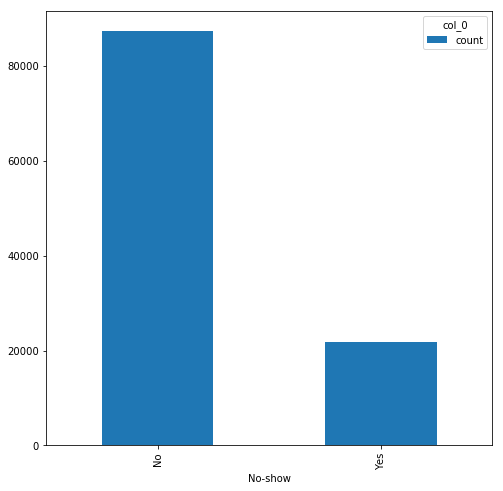

In [165]:
# I'm going to look at distribution frequencies and then see if I can make any more analysis
no_show_table = pd.crosstab(index=df_sort["No-show"], columns="count")
no_show_table
no_show_table.plot(kind="bar",figsize=(8,8))

20% no show

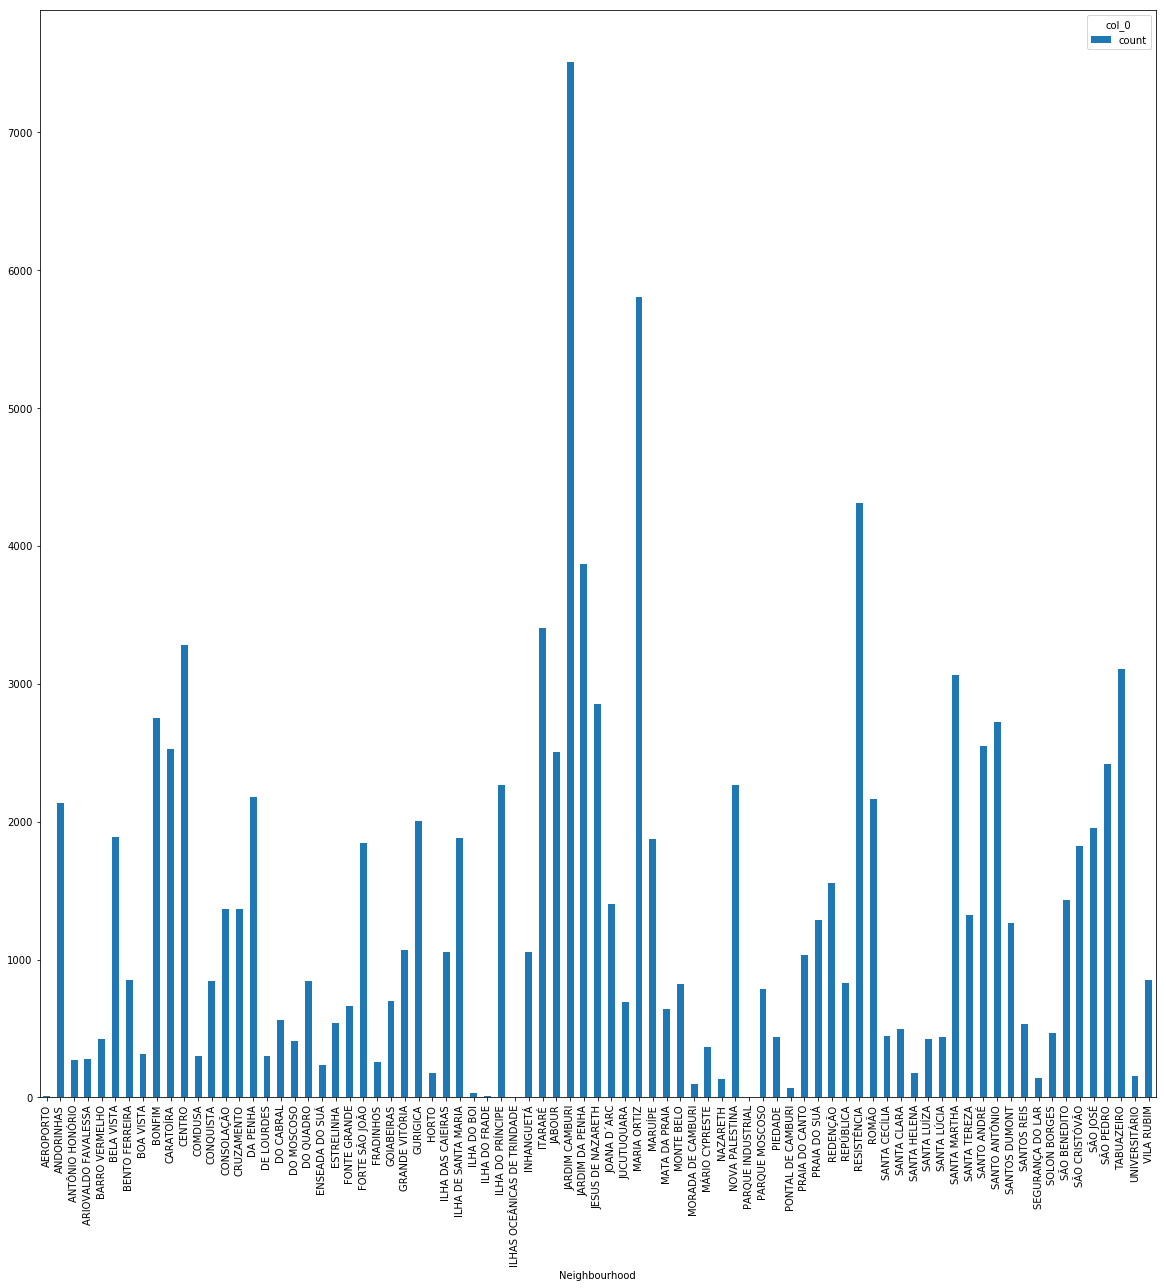

In [166]:
neighborhoods = pd.crosstab(index = df_sort['Neighbourhood'], columns = 'count')
#neighborhoods
neighborhoods.plot(kind ='bar', figsize=(20,20))

There is a wealth of information per neighborhood. I think it would be interesting to see
how the no-shows have been distribtuted across the city

In [167]:
df_hood = df_sort.groupby('Neighbourhood')
df_hood.describe().head()

Age                                                  \
                      count       mean        std   min    25%   50%    75%   
Neighbourhood                                                                 
AEROPORTO               8.0  53.125000  10.934056  36.0  47.50  58.0  59.75   
ANDORINHAS           2136.0  35.813202  22.406783   0.0  17.00  35.0  52.00   
ANTÔNIO HONÓRIO       271.0  36.845018  23.606299   0.0  17.00  33.0  53.00   
ARIOVALDO FAVALESSA   280.0  32.939286  23.695346   0.0  12.75  29.0  52.00   
BARRO VERMELHO        422.0  45.109005  20.092481   0.0  30.00  48.5  60.00   

                           Alcoholism           ...  Scholarship          Yes  \
                       max      count      mean ...          75%  max   count   
Neighbourhood                                   ...                             
AEROPORTO             64.0        8.0  0.000000 ...          0.0  0.0     8.0   
ANDORINHAS           115.0     2136.0  0.022004 ...          0.0  1.0  2136.0   
ANTÔNIO HONÓRIO      100.0      271.0  0.000000 ...          0.0  1.0   271.0   
ARIOVALDO FAVALESSA   97.0      280.0  0.050000 ...          0.0  1.0   280.0   
BARRO VERMELHO        92.0      422.0  0.004739 ...          0.0  0.0   422.0   

                                                                  
                         mean       std  min  25%  50%  75%  max  
Neighbourhood                                                     
AEROPORTO            0.125000  0.353553  0.0  0.0  0.0  0.0  1.0  
ANDORINHAS           0.221910  0.415628  0.0  0.0  0.0  0.0  1.0  
ANTÔNIO HONÓRIO      0.184502  0.388611  0.0  0.0  0.0  0.0  1.0  
ARIOVALDO FAVALESSA  0.221429  0.415952  0.0  0.0  0.0  0.0  1.0  
BARRO VERMELHO       0.215640  0.411754  0.0  0.0  0.0  0.0  1.0  

[5 rows x 80 columns]

Yeah - this isn't going to work with the describe function on all the columns. 

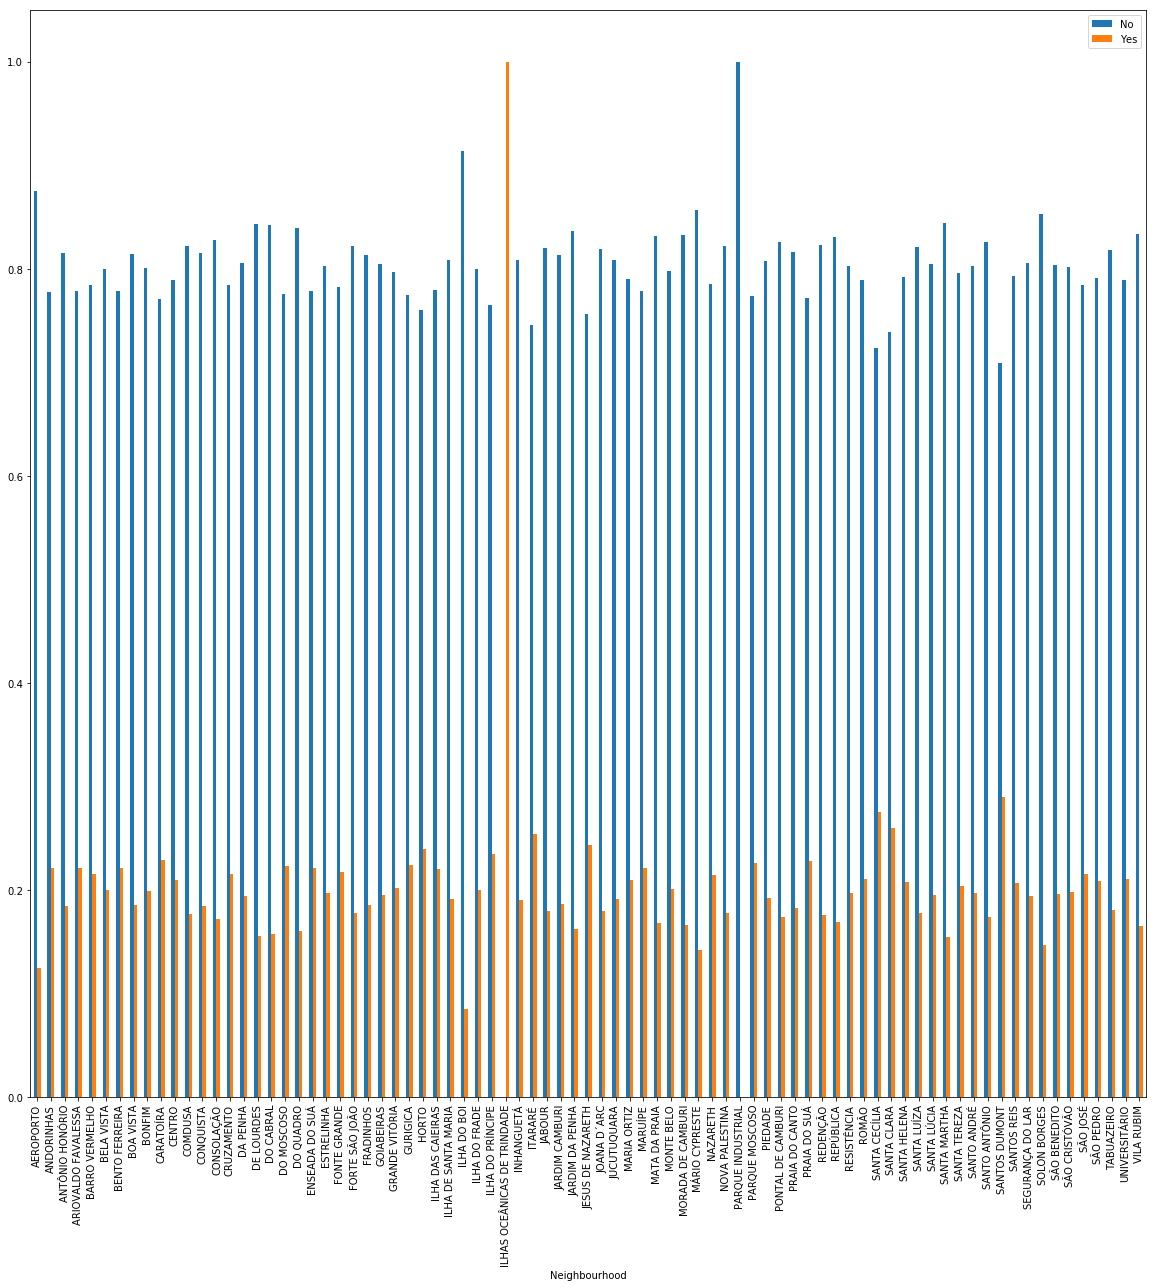

In [172]:
df_hood['No','Yes'].mean().plot(kind = 'bar', figsize=(20,20))

In [9]:
# Duration between scheduled day and apointment day
df_sort['Waiting_time'] = df_sort['AppointmentDay'].sub(df_sort['ScheduledDay'], axis=0)
df_sort.Waiting_time.head(10)

0     2 days 13:03:19
1   -1 days +09:37:02
2   -1 days +14:47:31
3     2 days 16:46:24
4     6 days 16:40:03
5     2 days 12:01:42
6   -1 days +14:17:53
7    20 days 10:22:48
8    18 days 16:36:30
9    26 days 12:37:45
Name: Waiting_time, dtype: timedelta64[ns]

In [10]:
# This gives me a datetime type object and I would much prefer an integer of days
df_sort.Waiting_time = df_sort.Waiting_time.dt.days
df_sort.Waiting_time.head(10)

0     2
1    -1
2    -1
3     2
4     6
5     2
6    -1
7    20
8    18
9    26
Name: Waiting_time, dtype: int64

In [11]:
df_sort[['Waiting_time','Yes']].corr()

,Waiting_time,Yes
Waiting_time,1.000000,0.185291
Yes,0.185291,1.000000


count    109193.000000
mean          9.065746
std          15.200463
min          -7.000000
25%          -1.000000
50%           3.000000
75%          13.000000
max         178.000000
Name: Waiting_time, dtype: float64

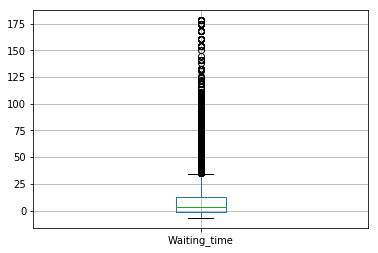

In [12]:
df_sort.Waiting_time.describe()
df_sort.boxplot('Waiting_time')

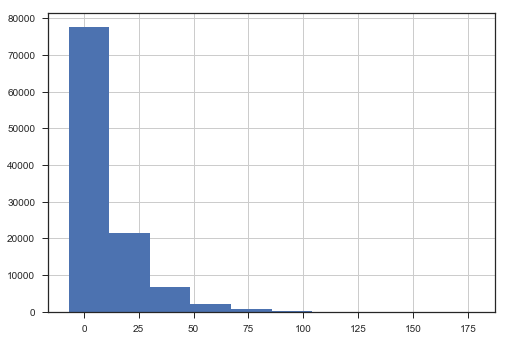

In [20]:
df_sort['Waiting_time'].hist()

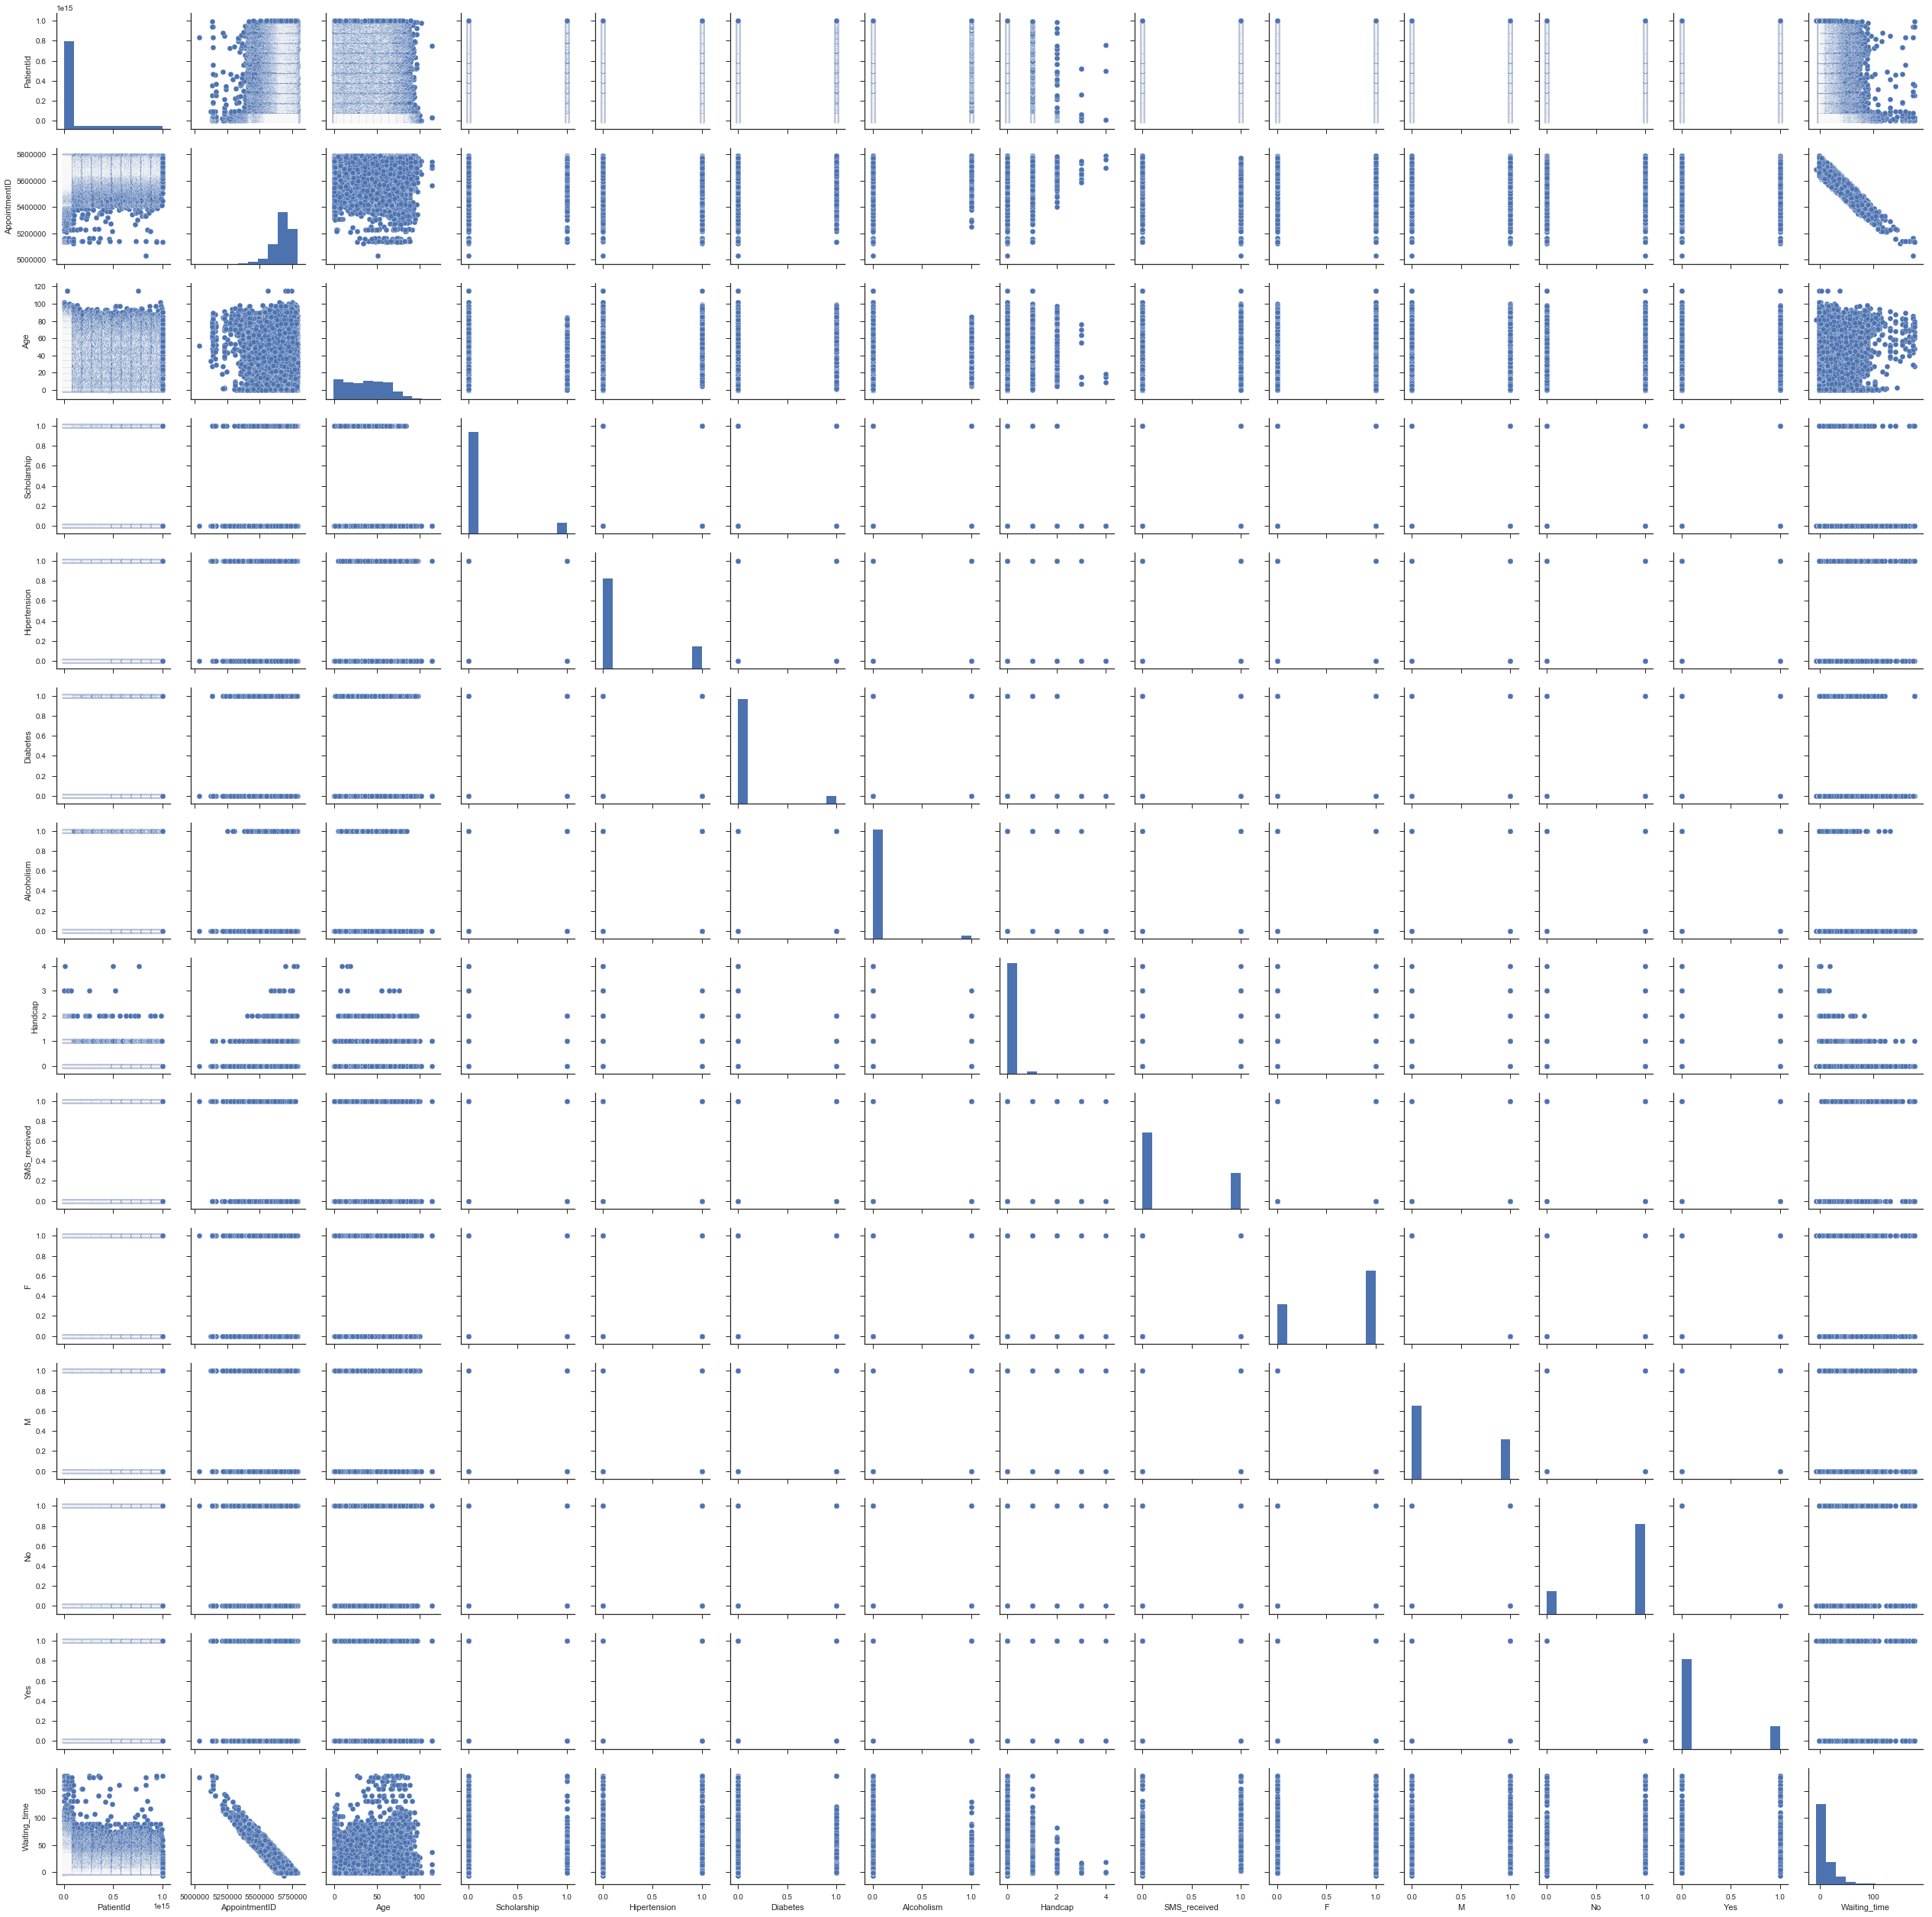

In [15]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_sort)

In [21]:
df_sort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109193 entries, 0 to 109192
Data columns (total 19 columns):
PatientId         109193 non-null int64
AppointmentID     109193 non-null int64
Gender            109193 non-null object
ScheduledDay      109193 non-null datetime64[ns]
AppointmentDay    109193 non-null datetime64[ns]
Age               109193 non-null int64
Neighbourhood     109193 non-null object
Scholarship       109193 non-null int64
Hipertension      109193 non-null int64
Diabetes          109193 non-null int64
Alcoholism        109193 non-null int64
Handcap           109193 non-null int64
SMS_received      109193 non-null int64
No-show           109193 non-null object
F                 109193 non-null uint8
M                 109193 non-null uint8
No                109193 non-null uint8
Yes               109193 non-null uint8
Waiting_time      109193 non-null int64
dtypes: datetime64[ns](2), int64(10), object(3), uint8(4)
memory usage: 12.9+ MB


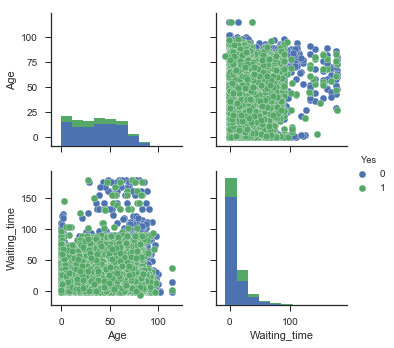

In [23]:
sns.pairplot(df_sort, vars=["Age", "Waiting_time"], hue='Yes')

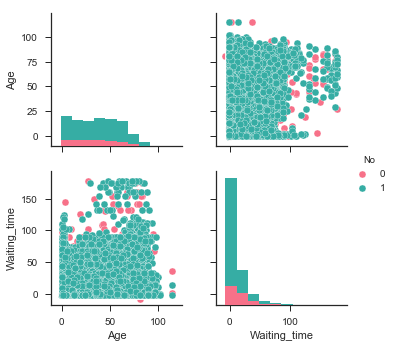

In [24]:
sns.pairplot(df_sort, vars=["Age", "Waiting_time"], hue='No', palette="husl")

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!